| Gene  | Ensembl ID         |
|-------|--------------------|
| C1QA  | ENSG00000173372    |
| C1QC  | ENSG00000159189    |
| C1QB  | ENSG00000173369    |
| FCN3  | ENSG00000142748    |
| CFH   | ENSG00000000971    |
| CD55  | ENSG00000196352    |
| CR1   | ENSG00000203710    |
| CD46  | ENSG00000117335    |
| C1D   | ENSG00000197223    |
| CFI   | ENSG00000205403    |
| C7    | ENSG00000112936    |
| C2    | ENSG00000166278    |
| CFP   | ENSG00000126759    |
| VCP   | ENSG00000165280    |
| C5    | ENSG00000106804    |
| FCN2  | ENSG00000160339    |
| FCN1  | ENSG00000085265    |
| CD59  | ENSG00000085063    |
| C1S   | ENSG00000182326    |
| C1R   | ENSG00000159403    |
| C3AR1 | ENSG00000171860    |
| C1QBP | ENSG00000108561    |
| CFD   | ENSG00000197766    |
| C3    | ENSG00000125730    |
| C5AR1 | ENSG00000197405    |
| C5AR2 | ENSG00000134830    |
| C6    | ENSG00000039537    |
| C9    | ENSG00000113600    |
| CR2   | ENSG00000117322    |
| C4B   | ENSG00000224389    |
| CFB   | ENSG00000243649    |
| C4A   | ENSG00000244731    |


In [3]:
# Prepare the environment
import gget

gget.setup("cellxgene")

# Uncomment the following line to see the documentation
# help(gget.cellxgene)

18:27:43 - INFO - Installing cellxgene-census package (requires pip).
18:27:44 - INFO - cellxgene_census installed succesfully.


Help on function cellxgene in module gget.gget_cellxgene:

cellxgene(species='homo_sapiens', gene=None, ensembl=False, column_names=['dataset_id', 'assay', 'suspension_type', 'sex', 'tissue_general', 'tissue', 'cell_type'], meta_only=False, tissue=None, cell_type=None, development_stage=None, disease=None, sex=None, is_primary_data=True, dataset_id=None, tissue_general_ontology_term_id=None, tissue_general=None, assay_ontology_term_id=None, assay=None, cell_type_ontology_term_id=None, development_stage_ontology_term_id=None, disease_ontology_term_id=None, donor_id=None, self_reported_ethnicity_ontology_term_id=None, self_reported_ethnicity=None, sex_ontology_term_id=None, suspension_type=None, tissue_ontology_term_id=None, census_version='stable', verbose=True, out=None)
    Query data from CZ CELLxGENE Discover (https://cellxgene.cziscience.com/) using the
    CZ CELLxGENE Discover Census (https://github.com/chanzuckerberg/cellxgene-census).

    NOTE: Querying large datasets requires

In [5]:
'''
Query the cellxgene database for the genes of interest
Filters:
Genes: C1QA, C1QC, C1QB, FCN3, CFH, CD55, CR1, CD46, C1D, CFI, C7, C2, CFP, VCP, C5, FCN2, FCN1, CD59, C1S, C1R, C3AR1, C1QBP, CFD, C3, C5AR1, C5AR2, C6, C9, CR2, C4B, CFB, C4A
disease: normal
tissue_general: kidney

> Query Time: 3m 30s

'''
adata = gget.cellxgene(
    ensembl=True,
    verbose=True,
    gene=["ENSG00000173372", "ENSG00000159189", "ENSG00000173369", "ENSG00000000971", "ENSG00000196352", "ENSG00000203710", "ENSG00000117335", "ENSG00000197223", "ENSG00000205403", "ENSG00000112936", "ENSG00000166278", "ENSG00000126759", "ENSG00000106804", "ENSG00000085063", "ENSG00000182326", "ENSG00000159403", "ENSG00000171860", "ENSG00000108561", "ENSG00000197766", "ENSG00000125730", "ENSG00000197405", "ENSG00000134830", "ENSG00000039537", "ENSG00000113600", "ENSG00000117322", "ENSG00000224389", "ENSG00000243649", "ENSG00000244731"],
    disease='normal',
    tissue_general='kidney'
)

22:14:57 - INFO - Fetching AnnData object from CZ CELLxGENE Discover. This might take a few minutes...
The "stable" release is currently 2025-01-30. Specify 'census_version="2025-01-30"' in future calls to open_soma() to ensure data consistency.
/Users/aumchampaneri/.pyenv/versions/miniconda3-latest/lib/python3.12/site-packages/gget/gget_cellxgene.py:189: FutureWarning: The argument `column_names` is deprecated and will be removed in a future release. Please use `obs_column_names` and `var_column_names` instead.
  adata = cellxgene_census.get_anndata(


In [8]:
print(adata.var_names[:10])  # Show the first 10 feature names
print(adata.var["feature_name"].head())  # Print first few feature names
adata.var_names = adata.var["feature_name"]
print([name for name in adata.var_names if "CFH" in name])
gene_map = dict(zip(adata.var["feature_name"], adata.var_names))
features_to_plot = [gene_map[gene] for gene in ['CFH', 'C5', 'C3AR1', 'C3_ENSG00000125730', 'C5AR1'] if gene in gene_map]

# sc.pl.violin(adata, features_to_plot, groupby="tissue_general", multi_panel=True)

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype='object')
0    C1QA
1    C1QC
2    C1QB
3     CFH
4    CD55
Name: feature_name, dtype: object
['CFH']


In [9]:
import pandas as pd
pd.set_option("display.max_rows", None)  # Ensure all rows are displayed
print(pd.Series(adata.obs["cell_type"].unique()))


0                                   renal principal cell
1                            kidney collecting duct cell
2        kidney distal convoluted tubule epithelial cell
3      kidney loop of Henle thick ascending limb epit...
4                                             macrophage
5                          renal alpha-intercalated cell
6                     epithelial cell of proximal tubule
7                           renal beta-intercalated cell
8                         vasa recta ascending limb cell
9                                               monocyte
10                     columnar/cuboidal epithelial cell
11                vascular associated smooth muscle cell
12                 glomerular capillary endothelial cell
13                       vasa recta descending limb cell
14                                   natural killer cell
15                                                T cell
16                                               unknown
17                             

Found 28 valid genes


/var/folders/dk/j41qmgy16b5_49s_wh137t_m0000gn/T/ipykernel_59461/286855128.py:42: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cell_type_mean_expr = all_expression_data.groupby("Cell_Type")["Expression"].mean()
/var/folders/dk/j41qmgy16b5_49s_wh137t_m0000gn/T/ipykernel_59461/286855128.py:51: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = filtered_data.pivot_table(


<Figure size 2000x2000 with 0 Axes>

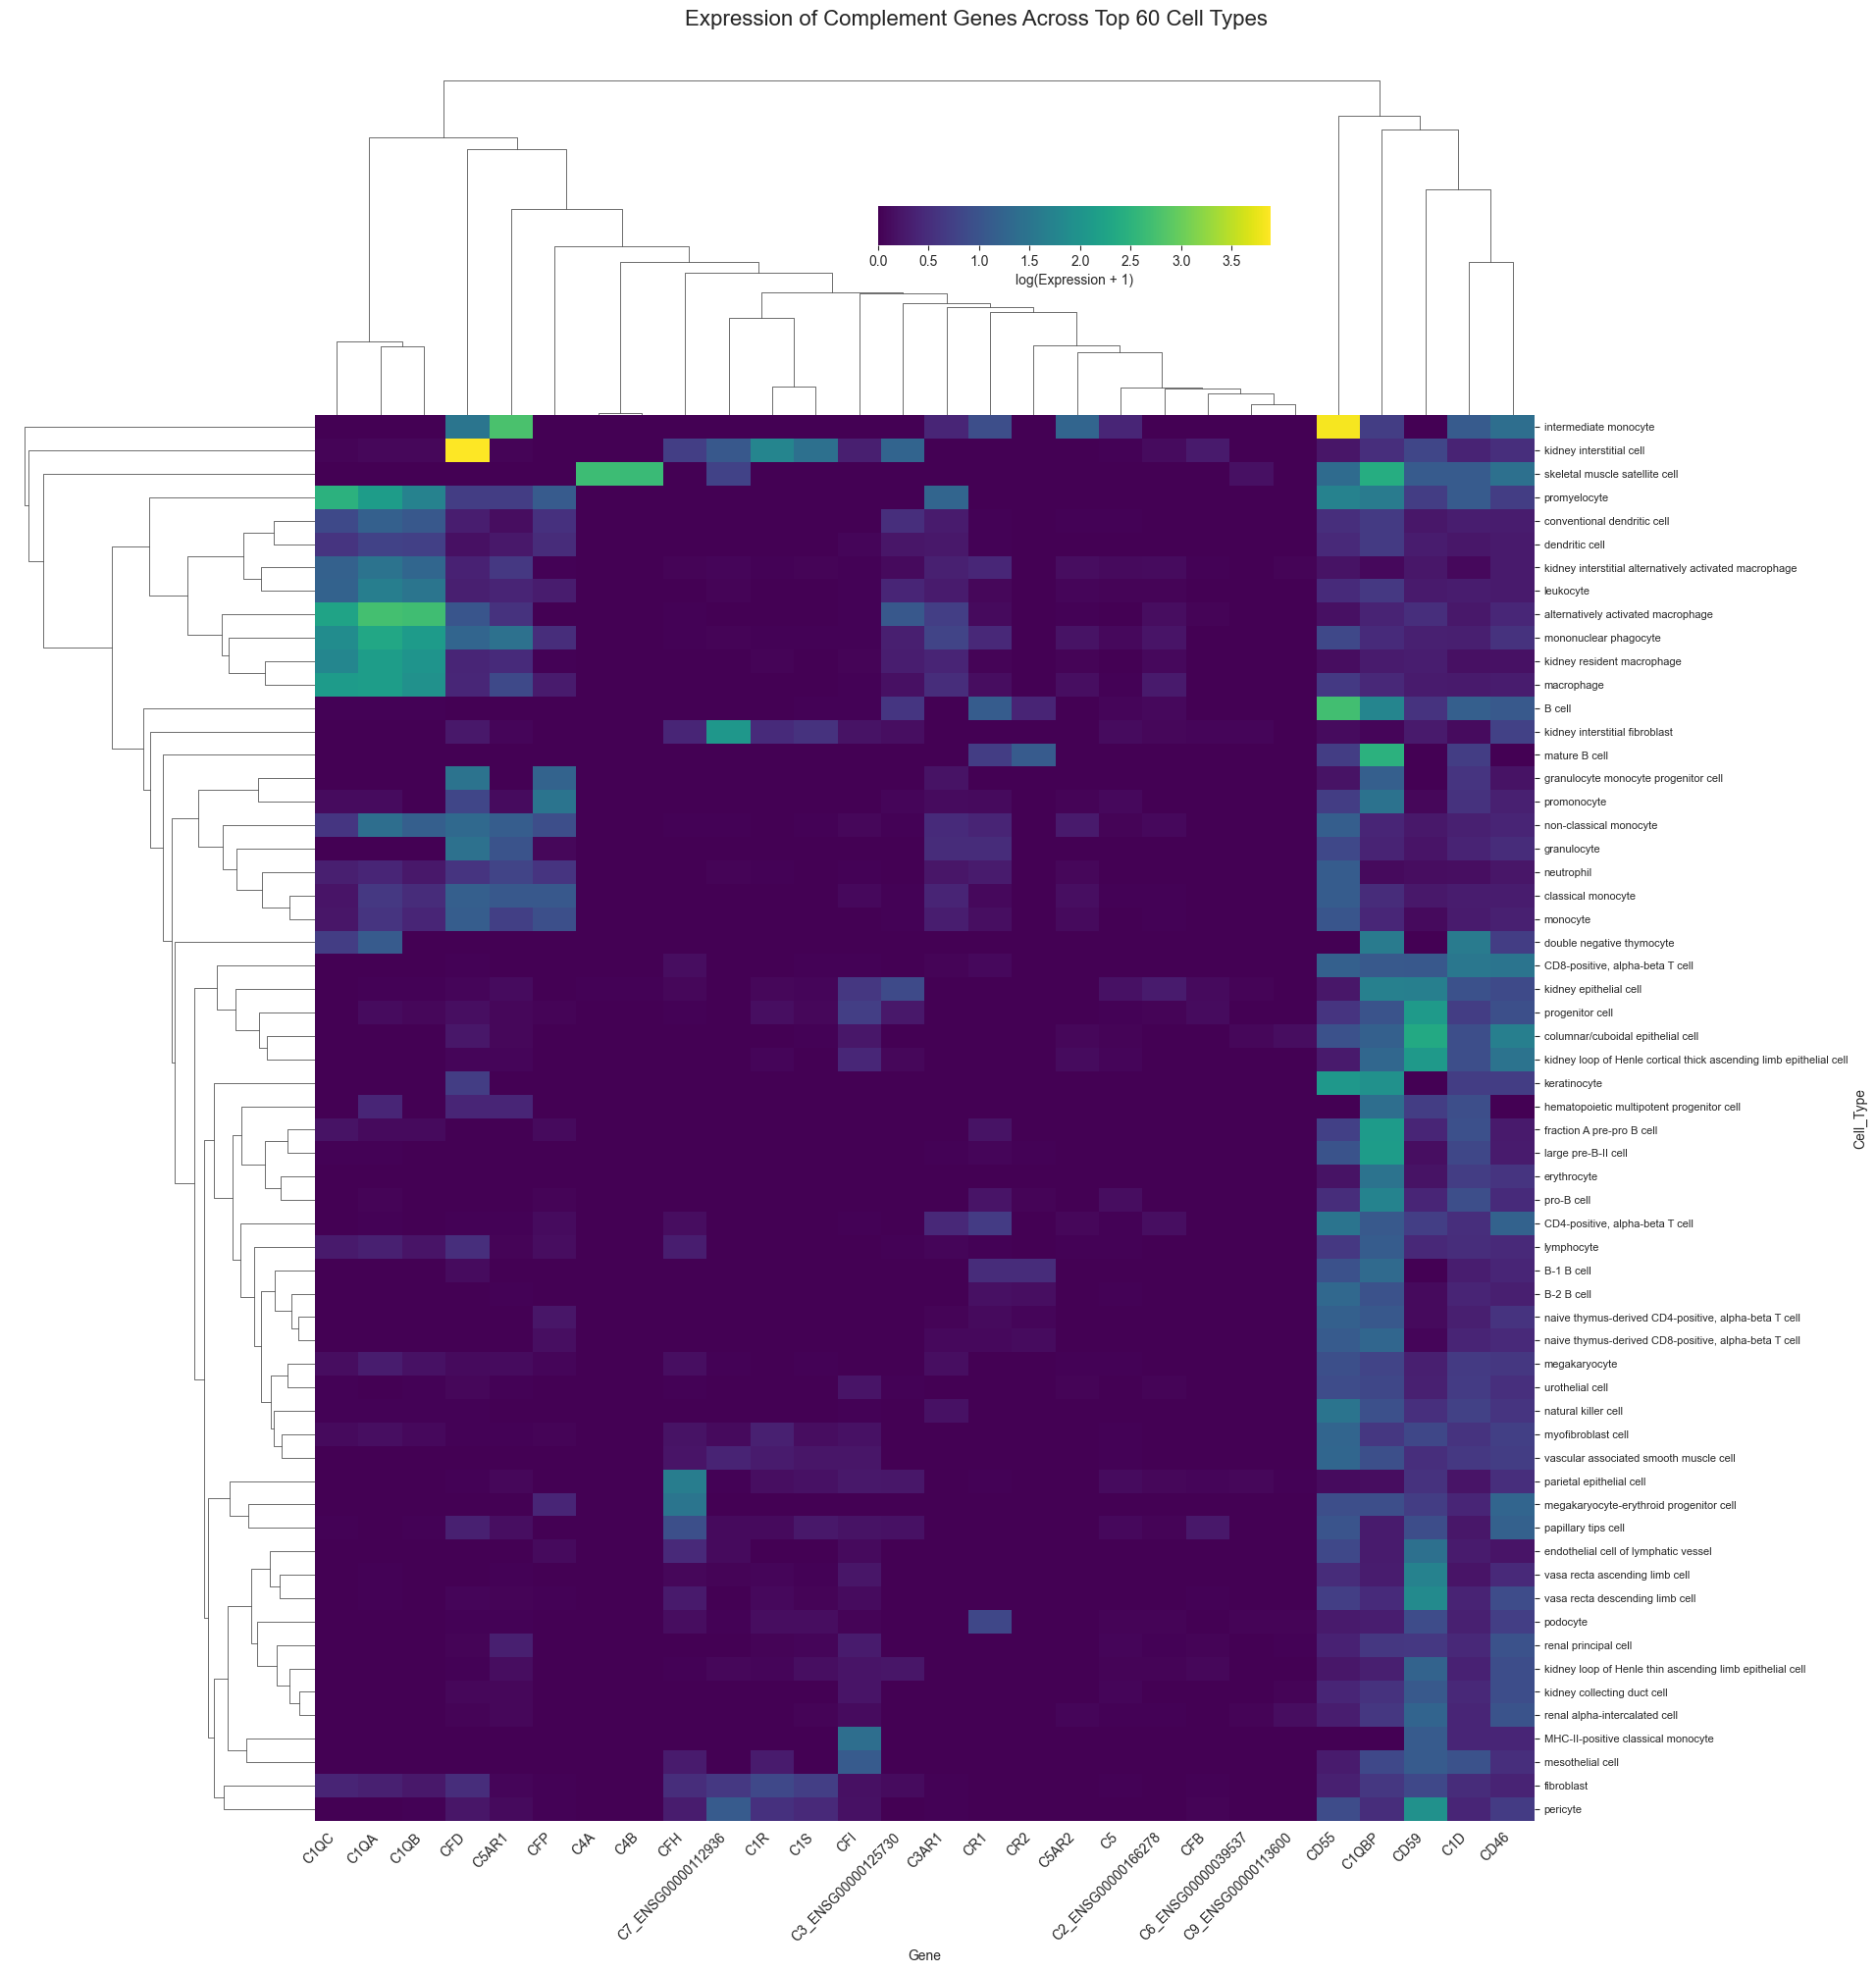

In [19]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster import hierarchy
from mpl_toolkits.axes_grid1 import make_axes_locatable

# List of genes to analyze
genes = ["C1Q", "C1QA", "C1QB", "C1QBP", "C1QC", "C1R", "C1S", "C1D", "C2", "C2_ENSG00000166278", "C3", "C3_ENSG00000125730", "C4", "C4A", "C4B", "C5", "C6", "C6_ENSG00000039537", "C7", "C7_ENSG00000112936", "C8", "C9", "C9_ENSG00000113600", "CFB", "CFD", "CFH", "CFI", "CFP", "MBL", "FCN1", "FCN2", "FCN3", "CD46", "CD55", "CD59", "VCP", "CR1", "CR2", "CR3", "CR4", "C5AR1", "C5AR2", "C3AR1"]

# Ensure the genes are in the dataset
valid_genes = [gene for gene in genes if gene in adata.var_names]

if not valid_genes:
    print("None of the specified genes are in the dataset.")
else:
    print(f"Found {len(valid_genes)} valid genes")

    # Create a dataframe to collect all expression data
    all_expression_data = pd.DataFrame()

    # Collect expression data for each gene
    for gene in valid_genes:
        # Get expression values
        expr_values = adata[:, gene].X.toarray().flatten()

        # Get cell types
        cell_types = adata.obs["cell_type"]

        # Create temporary dataframe for this gene
        temp_df = pd.DataFrame({
            "Gene": gene,
            "Cell_Type": cell_types,
            "Expression": expr_values
        })

        # Append to the main dataframe
        all_expression_data = pd.concat([all_expression_data, temp_df])

    # Calculate mean expression per cell type across all genes
    cell_type_mean_expr = all_expression_data.groupby("Cell_Type")["Expression"].mean()

    # Get top 60 cell types based on mean expression
    top_60_cell_types = cell_type_mean_expr.sort_values(ascending=False).head(60).index.tolist()

    # Filter data to only include top 60 cell types
    filtered_data = all_expression_data[all_expression_data["Cell_Type"].isin(top_60_cell_types)]

    # Pivot the data to create a matrix suitable for heatmap plotting
    heatmap_data = filtered_data.pivot_table(
        index="Cell_Type",
        columns="Gene",
        values="Expression",
        aggfunc="mean"
    )

    # Apply log transformation for better visualization
    heatmap_data_log = np.log1p(heatmap_data)

    # Plot clustered heatmap
    plt.figure(figsize=(20, 20))
    g = sns.clustermap(
        heatmap_data_log,
        figsize=(20, 20),
        cmap="viridis",
        yticklabels=True,
        xticklabels=True,
        cbar_pos=(0.45, 0.9, 0.2, 0.02),  # Move colorbar to top (x, y, width, height)
        cbar_kws={'orientation': 'horizontal', 'label': 'log(Expression + 1)'},
        dendrogram_ratio=(0.2, 0.2),
        row_cluster=True,  # Cluster cell types
        col_cluster=True   # Cluster genes
    )

    # Adjust font sizes and rotate x-axis labels for better readability
    g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_yticklabels(), fontsize=8)
    g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xticklabels(), fontsize=10, rotation=45, ha='right')

    plt.suptitle("Expression of Complement Genes Across Top 60 Cell Types", y=1.02, fontsize=16)
    plt.show()